In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics


In [14]:
df = pd.read_csv("OnlineRetail2.csv",encoding='unicode_escape', index_col=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
df.shape

(1048575, 8)

In [12]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [17]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [19]:
df = df.dropna()
df.drop_duplicates()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,12/4/2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,12/4/2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,12/4/2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,12/4/2011 13:15,2.89,16931.0,United Kingdom


In [20]:
df['CustomerID'] = df['CustomerID'].astype(int)


In [21]:
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [22]:
#recency

#to_date = datetime.today()
to_date = "2024-1-10"
to_date=pd.to_datetime(to_date)

df['InvoiceDate'] = pd.to_datetime(df["InvoiceDate"])
df['InvoiceDate'] = df['InvoiceDate'] + pd.DateOffset(years=12)
df['InvoiceDate'].max()

Timestamp('2023-12-04 13:15:00')

In [23]:
df = df.drop(["StockCode","Country"], axis=1)


In [24]:
df

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2021-12-01 07:45:00,6.95,13085
1,489434,PINK CHERRY LIGHTS,12,2021-12-01 07:45:00,6.75,13085
2,489434,WHITE CHERRY LIGHTS,12,2021-12-01 07:45:00,6.75,13085
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2021-12-01 07:45:00,2.10,13085
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2021-12-01 07:45:00,1.25,13085
...,...,...,...,...,...,...
1048570,580501,DOORMAT KEEP CALM AND COME IN,2,2023-12-04 13:00:00,8.25,14546
1048571,580501,MEMO BOARD RETROSPOT DESIGN,3,2023-12-04 13:00:00,4.95,14546
1048572,580502,HEART OF WICKER SMALL,3,2023-12-04 13:15:00,1.65,16931
1048573,580502,VINTAGE BELLS GARLAND,2,2023-12-04 13:15:00,2.89,16931


In [25]:
#df.shape[0]
arr = df.CustomerID.unique()
len(arr)

5924

In [26]:
#df.shape[0]
arr1 = df.InvoiceNo.unique()
len(arr1)

44278

In [15]:
df.to_csv('Cleaned_OnlineRetail2.csv', index=False)

In [16]:
recency=df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x:((to_date-x.max()).days)})

In [17]:
recency.head(10)

,InvoiceDate
CustomerID,
12346,355
12347,32
12348,105
12349,48
12350,340
12352,66
12353,234
12354,262
12355,244


In [18]:
# frquency

frequency = df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
frequency.head(7)

,InvoiceNo
CustomerID,
12346,2
12347,7
12348,4
12349,1
12350,1
12352,11
12353,1


In [19]:
#monetary

df["total"]=df["Quantity"]*df["UnitPrice"]

In [20]:
monetary = df.groupby(["CustomerID"])[["total"]].sum()
monetary

,total
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,176.60


In [21]:
RFM = pd.concat([recency,frequency,monetary], axis=1)


In [22]:

RFM.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo':'Frequency','total':'Monetary'}, inplace=True)
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346,355,2,0.00
12347,32,7,4310.00
12348,105,4,1797.24
12349,48,1,1757.55
12350,340,1,334.40
...,...,...,...
18280,307,1,180.60
18281,210,1,80.82
18282,37,3,176.60


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)


C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


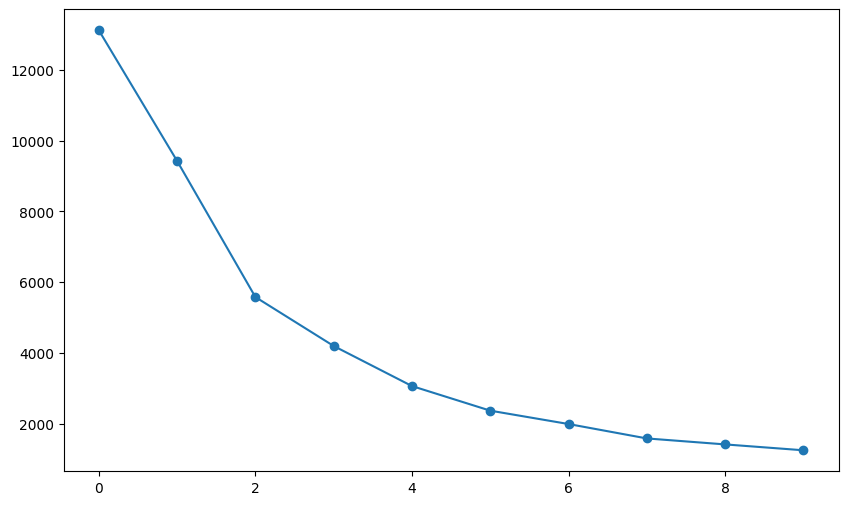

In [24]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(inertia, marker="o")

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)


In [26]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346,355,2,0.00,2
12347,32,7,4310.00,1
12348,105,4,1797.24,1
12349,48,1,1757.55,1
12350,340,1,334.40,2
...,...,...,...,...
18280,307,1,180.60,2
18281,210,1,80.82,2
18282,37,3,176.60,1


In [27]:
final=RFM.groupby("Clusters")[["Recency","Frequency","Monetary"]].mean()
final

,Recency,Frequency,Monetary
Clusters,,,
1,71.144841,4.802777,1478.778426
2,277.483901,1.804968,452.722476
3,37.166667,89.000000,182181.981667
4,38.609091,40.672727,18441.961455


In [28]:
final = final.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[True, False, False])
final

,Recency,Frequency,Monetary
Clusters,,,
3,37.166667,89.000000,182181.981667
4,38.609091,40.672727,18441.961455
1,71.144841,4.802777,1478.778426
2,277.483901,1.804968,452.722476


In [29]:
def func_choise_4(row,excellent_one, good_one, avg_one):

    if row["Clusters"] ==  excellent_one:
        return 'Whales'
    elif row["Clusters"] == good_one:
        return 'Shark'
    elif row["Clusters"] == avg_one:
        return 'Avarage'  
    else:
        return 'Lapsed'


In [30]:
good_one = final.index[0]
avg_one = final.index[1]


In [31]:
def func(row):
    if row["Clusters"] ==  good_one:
        return 'Whales'
    elif row["Clusters"] == avg_one:
        return 'Average'
    else:
        return 'Lapsed'

In [32]:
excellent_one = final.index[0]
good_one = final.index[1]
avg_one = final.index[2]
RFM['Group'] = RFM.apply(func_choise_4, args=(excellent_one,good_one,avg_one), axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
12346,355,2,0.00,2,Lapsed
12347,32,7,4310.00,1,Avarage
12348,105,4,1797.24,1,Avarage
12349,48,1,1757.55,1,Avarage
12350,340,1,334.40,2,Lapsed
...,...,...,...,...,...
18280,307,1,180.60,2,Lapsed
18281,210,1,80.82,2,Lapsed
18282,37,3,176.60,1,Avarage


In [33]:
#RFM['Group'] = RFM.apply(func, axis=1)
#RFM

In [34]:
RFM.Group.value_counts()

Group
Avarage    3169
Lapsed     1087
Shark       110
Whales        6
Name: count, dtype: int64

In [35]:
RFM.columns

Index(['Recency', 'Frequency', 'Monetary', 'Clusters', 'Group'], dtype='object')

In [48]:
df_average = RFM[RFM['Group'] == 'Avarage']


In [49]:
df_average

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
12347,32,7,4310.00,1,Avarage
12348,105,4,1797.24,1,Avarage
12349,48,1,1757.55,1,Avarage
12352,66,11,1545.41,1,Avarage
12356,52,3,2811.43,1,Avarage
...,...,...,...,...,...
18277,88,2,97.63,1,Avarage
18278,103,1,173.90,1,Avarage
18282,37,3,176.60,1,Avarage


In [37]:
#Split Dataset

#x = RFM.drop(['Clusters','Group'],axis=1)
#y = RFM[['Group']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [38]:
#x_train

In [39]:
#Decision_Tree
#model= DecisionTreeClassifier(criterion="entropy")
#model.fit(x_train, y_train)
#y_pred = model.predict(x_test)


In [40]:
#Confusion_Matrix
#print(metrics.confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [41]:
#example_output = model.predict([[3,7,8440]])
#example_output[0]

In [42]:
#result = model.score(x_test, y_test)
#result

In [43]:
#import pickle
#filename = 'cluster_model_predictor.sav'
#pickle.dump(model, open(filename, 'wb'))

In [44]:
#import pickle
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.predict([[8,72,4200]])
#result


NameError: name 'filename' is not defined